## Media Company 

 Problem Statement : 
 
     - A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [75]:
# Import all required packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [76]:
media = pd.read_csv('mediacompany.csv')
media.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [77]:
# Drop the Unnamed: column 
media= media.drop('Unnamed: 7', axis=1)
media.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [78]:
# Conerting Date column to pandas Datetime format 
media['Date'] = pd.to_datetime(media['Date'])
media.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [79]:
media.shape

(80, 7)

In [80]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 80 non-null     datetime64[ns]
 1   Views_show           80 non-null     int64         
 2   Visitors             80 non-null     int64         
 3   Views_platform       80 non-null     int64         
 4   Ad_impression        80 non-null     int64         
 5   Cricket_match_india  80 non-null     int64         
 6   Character_A          80 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.5 KB


In [81]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [82]:
# Deriving the "days since show started"
# Since the show started on 3/1/2017, Start date is kept as 2/28/2017 which is a day before 
start = pd.to_datetime('2/28/2017')
media['days_started'] = media['Date']- start 
media.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days_started
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [83]:
# since 'days_started' column has days attached - it should be cleaned 
media['days_started'] = media['days_started'].astype(str)
media['days_started'] = media['days_started'].map(lambda x:x[0:2])
media['days_started'] = media['days_started'].astype(int)
media.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days_started
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


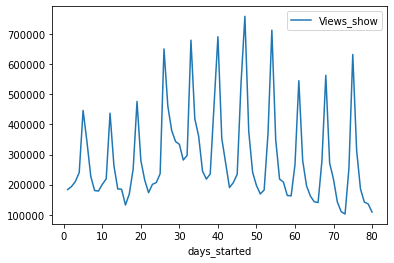

In [84]:
# days_started vs view_show 
media.plot.line(x='days_started',y='Views_show')

- Plotted days_started and views_show to understand significant pattern in the show views since the show started. 

In [85]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media['weekday'] = (media['days_started']+3)%7
media.weekday.replace(0,7,inplace=True)
media.weekday.astype(int)
media.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days_started,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


## Running first model with visitors and weekday

- First question we try to figure out is , is the visitors to the platform declined which caused the declined in viewership. So we try to build a model with Visitors. And also added weekday variable to check if the decline has any trend on weekday

In [86]:
X = media[['Visitors','weekday']]
y = media['Views_show']

In [87]:
import statsmodels.api as sm 
X = sm.add_constant(X) 
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           8.01e-12
Time:                        14:43:06   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

Inferences :
    - p-value for visitors and weekday < 0.05 which says both the variables are significant.
    - Also, r2 and adjusted r2 value for this model is 48.5 and 47.2% which is fairly good for a model 
    - Looking at the co-efficents, weekday has a negative co-efficient, so that can be changed as 'weekend' variable to tell the story with positive co-efficient.
    - so create a weekend variable that might help the marketing team understand better. 

In [88]:
# Creating a weekend variable with value 1 at weekends and 0 at weekdays 
def weekday(i):
    if i in [1,7]: return 1
    else: return 0
media['weekend'] = [weekday(i) for i in media['weekday']]
media.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days_started,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


## Running second model with visitors and weekend

In [89]:
X = media[['Visitors','weekend']]
y = media['Views_show']

In [90]:
X = sm.add_constant(X)
lm_2 = sm.OLS(y,X).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           2.51e-12
Time:                        14:43:07   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

Inferences :
- p-value for co-visitors and weekend < 0.05 and hence the values are significant 
- Also, r2 and adjusted r2 for this modelhas an increase i.e. 50% ans 48.7% in comparison with previous model.
- Hence, this model is good to go with

## Running third model with visitors, weekend, Character_A

    - Since we are good with visitor, weekend variables, let's try to include 'Character_A' which might have an impact with the viewership

In [91]:
X = media[['Visitors','weekend', 'Character_A']]
y = media['Views_show']

In [92]:
X = sm.add_constant(X)
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.53e-14
Time:                        14:43:07   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

Inferences :
- Introducing character_A has increased the r2 and adjusted r2 value to 58% and 57% repectively, which says it significant 
- Also, p-value and co-efficient of character_A is positive and still high 
- So, Whenever Character_A has appeared there is a spike in viewership and this could be given as a suggestion to include character_A for future viewership

In [93]:
# Introducing Lag_views to understand if yesterday's viewership has an impact with today's viewership and content
# Adding yesterday's view show as an attribute to check if it has any impact on today's viewership
media['Lag_views'] = np.roll(media['Views_show'],1)
media['Lag_views'].replace(108961,0, inplace=True)
media.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days_started,weekday,weekend,Lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


## Running fourth model with visitors, weekend, Character_A and Lag_views

    - Adding yesterday's view show as an attribute to check if it has any impact on today's viewership

In [94]:
X = media[['Visitors','weekend', 'Character_A','Lag_views']]
y = media['Views_show']

In [95]:
X = sm.add_constant(X)
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           3.16e-21
Time:                        14:43:09   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

Inferences :
    - r2 and adjusted r2 has a drasticall increse to 74% and 72%.
    - p-value of Visiotrs > 0.05 which leads to insignificance of this variable. (Adding lag_views has made visitors variable insignificant) 
    - Maybe lag_views and visitors highly correlated, we cannot use both of them 
    - remove lag_views and visitors
    - Introduce Views_platform to build a model

## Running fifth model with  weekend, Character_A and Views_platform

In [96]:
X = media[['weekend', 'Character_A','Views_platform']]
y = media['Views_show']

In [97]:
X = sm.add_constant(X)
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           3.59e-15
Time:                        14:43:09   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

Inferences :
    - r2 and adjusted r2 has dropped to 60% and 58%
    - still p-value of all the variables are significant and co-efficients are positive. 
    - this model is significant

## Running sixth model with  weekend, Character_A and Visitors 

- After analysis, Views_platform is considered as derived variable and marketing team wants to go with Visitors as it has direct impact on viewership

In [98]:
X = media[['weekend', 'Character_A','Visitors']]
y = media['Views_show']

In [99]:
X = sm.add_constant(X)
lm_6 = sm.OLS(y,X).fit() 
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.53e-14
Time:                        14:43:10   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

Inferences :
    - r2 and adjusted r2 is 58% and 57% 
    - Keep the model as it has good r2 and business requirement is fulfilled

## Running seventh model with  weekend, Character_A , Visitors and Ad_Impressions

- Introducing Ad_impressions to the model

In [100]:
X = media[['weekend', 'Character_A','Visitors', 'Ad_impression']]
y = media['Views_show']

In [101]:
X = sm.add_constant(X)
lm_7 = sm.OLS(y,X).fit() 
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.10e-25
Time:                        14:43:11   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

Inferences :
    - Visitor has become insignificant due to p value 0.7 
    - Character_A has negative co-efficient which is a sudden change from previous model. (Previous model suggested that character_A presence is inmprovising the viewership, current model suggest character_A absence is improvising the viewership which is contradicting)
    - Hence let's check for VIF for the variables to see if they have any multicollinearity

## Checking the VIF values for variables 

In [102]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,77.94
4,Ad_impression,2.21
2,Character_A,1.76
3,Visitors,1.52
1,weekend,1.33


- VIF values looks good and there is no multi collinearity. 
- Hence it's better to remove the Visitor as it is highly insignificant

## Running eighth model with  weekend, Character_A  and Ad_Impressions

In [104]:
X = media[['weekend', 'Character_A', 'Ad_impression']]
y = media['Views_show']

In [105]:
X = sm.add_constant(X)
lm_8 = sm.OLS(y,X).fit() 
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.05e-26
Time:                        14:43:13   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

Inferences :
    - r2 and adjusted r2 has not reduced even after removing visitors 
    - character_A has negative co-efficient with p-value > 0.05 
    - Ad_impression has co-eff which is more/less equal to 0 which will  never be a case if that variable is highly significant. This is due to high value of ad_impression and hence it can be converted to millions.
    - Hence we cannot consider this model as significant.  
    - Also, adding cricket_match_india as next variable.

In [106]:
#Ad impression in million
media['ad_impression_million'] = media['Ad_impression']/1000000

## Running nineth model with Character_A, weekend, ad_impressions_million & Cricket_match_india

In [107]:
X = media[['weekend', 'Character_A', 'ad_impression_million', 'Cricket_match_india']]
y = media['Views_show']

In [108]:
X = sm.add_constant(X)
lm_9 = sm.OLS(y,X).fit() 
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.02e-25
Time:                        14:43:14   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

Inferences:
    - Cricket_match_india has p-value > 0.05 and hence it is insignificant and can be removed

## Running tenth model with Character_A, weekend, ad_impressions_million 

In [109]:
X = media[['weekend', 'Character_A', 'ad_impression_million']]
y = media['Views_show']

In [110]:
X = sm.add_constant(X)
lm_10 = sm.OLS(y,X).fit() 
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.05e-26
Time:                        14:43:16   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

Inferences :
    - Character_A still has p-value > 0.05 and co-eff is negative

## Running eleventh model with  weekend, ad_impressions_million 

In [111]:
X = media[['weekend', 'ad_impression_million']]
y = media['Views_show']

In [112]:
X = sm.add_constant(X)
lm_11 = sm.OLS(y,X).fit() 
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.95e-27
Time:                        14:43:17   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.302e+

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,25.77
1,weekend,1.12
2,ad_impression_million,1.12


Inference :
    - r2 and adjusted r2 is still high about 79% 
    - all the p-values for variables are significant 
    - all the co-efficients are negative
    - VIF values are good and hence there is no multicollinearity 
    - We can conclude that this model is good enough to predict

## Making Predictions on Final Model

In [114]:
# Since our final model has only weekend, ad_impression_million, predict using that 
X = media[['weekend', 'ad_impression_million']]
X = sm.add_constant(X)
predicted_views = lm_11.predict(X)

Text(0, 0.5, 'Views')

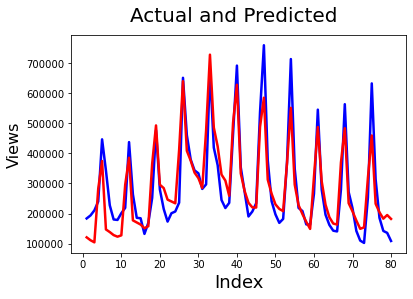

In [115]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)    

Inferences:
    - Actual values and Predicted values are plotted and it is found that both are mostly similar. Hence our model is actually good in predicting.

# Check for RMSE
- Root Mean Squared Error is a metric that tells the deviation of predicted values by a model from the actual values

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, predicted_views)
r_squared = r2_score(media.Views_show, predicted_views)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4797239258.824437
r_square_value : 0.7975978797926214
